Check mass thresh:

In [1]:
from gal_goku_sims import xi

corr = xi.Corr()
basedir = '/scratch/06536/qezlou/Goku/FOF/HF'
pigs = corr.get_pig_dirs(basedir, z=2.5, narrow=False)

ModuleNotFoundError: No module named 'gal_goku_sims'

In [ ]:
pigs['pig_dirs']

['/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0024/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0025/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0026/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0054/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0055/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0056/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0072/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0073/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0074/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0207/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0208/output/PIG_003',
 '/scratch

In [ ]:
import os
os.mkdi

In [ ]:
np.array(cat['Mass'][10:20])
print(cat['Mass'])
ind = cat['Mass'] > 1e11
new_cat = cat[ind]
print(new_cat, cat)

dask.array<mul, shape=(382736,), dtype=float32, chunksize=(100000,), chunktype=numpy.ndarray> first: 65690550000000.0 last: 81177740000.0
HaloCatalog(size=295748) HaloCatalog(size=382736)


<KeysViewHDF5 ['corr', 'mbins', 'pairs', 'sim_tag']>
<HDF5 dataset "corr": shape (231, 50), type "<f8">


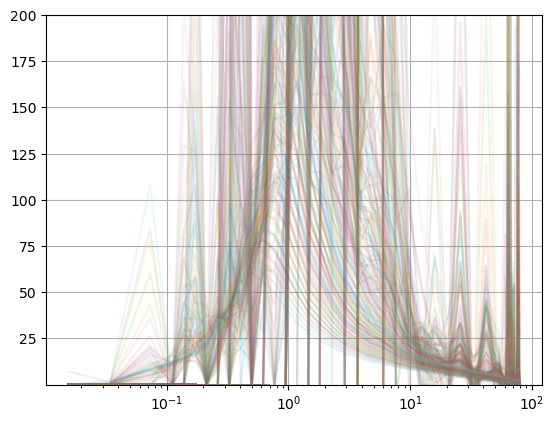

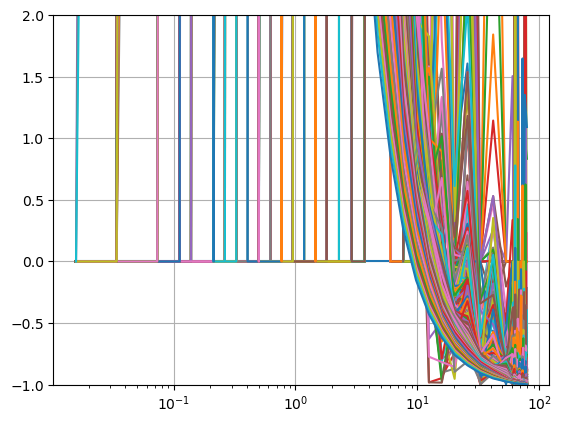

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from gal_goku import utils

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2/'
with h5py.File(f'{save_dir}compressed_10p_Box250_Part750_0396.hdf5','r') as f:
    print(f.keys())
    mbins = f['mbins'][:]
    corr = f['corr'][:]
    print(f['corr'])
    fig, ax = plt.subplots()
    figr, axr = plt.subplots()

    for i in range(corr.shape[0]):
        #ax.scatter(mbins, mbins*corr[i], s=10, marker='*')
        ax.plot(mbins, mbins*corr[i], alpha=0.1)
        fit = utils.ConstrainedSplineFitter(logging_level='INFO', degree=3, constraints=False)
        ind = mbins < 10
        knots= mbins[ind]
        #spline = fit.fit_spline(mbins[ind], corr[ind], knots= knots)

        fine_mbins = 10**np.arange(np.log10(mbins[0]), np.log10(mbins[-1])+0.02, 0.05)
        #ax.plot(fine_mbins, fine_mbins*spline(fine_mbins), color='C1')
        ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.grid(True)
        ax.set_ylim((1e-2,2e2))



        axr.plot(mbins, np.abs(corr[i]/corr[0]) -1 )
        axr.set_xscale('log')
        axr.grid(True)
        axr.set_ylim((-1,2))
    

BaseStatEmu | 02/24/2025 05:20:56 PM | Rank 0 | INFO  |  Total sims files: 242 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2
BaseStatEmu | 02/24/2025 05:21:04 PM | Rank 0 | INFO  |  Total sims files: 14 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
BaseStatEmu | 02/24/2025 05:21:04 PM | Rank 0 | INFO  |  Total sims files: 14 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF


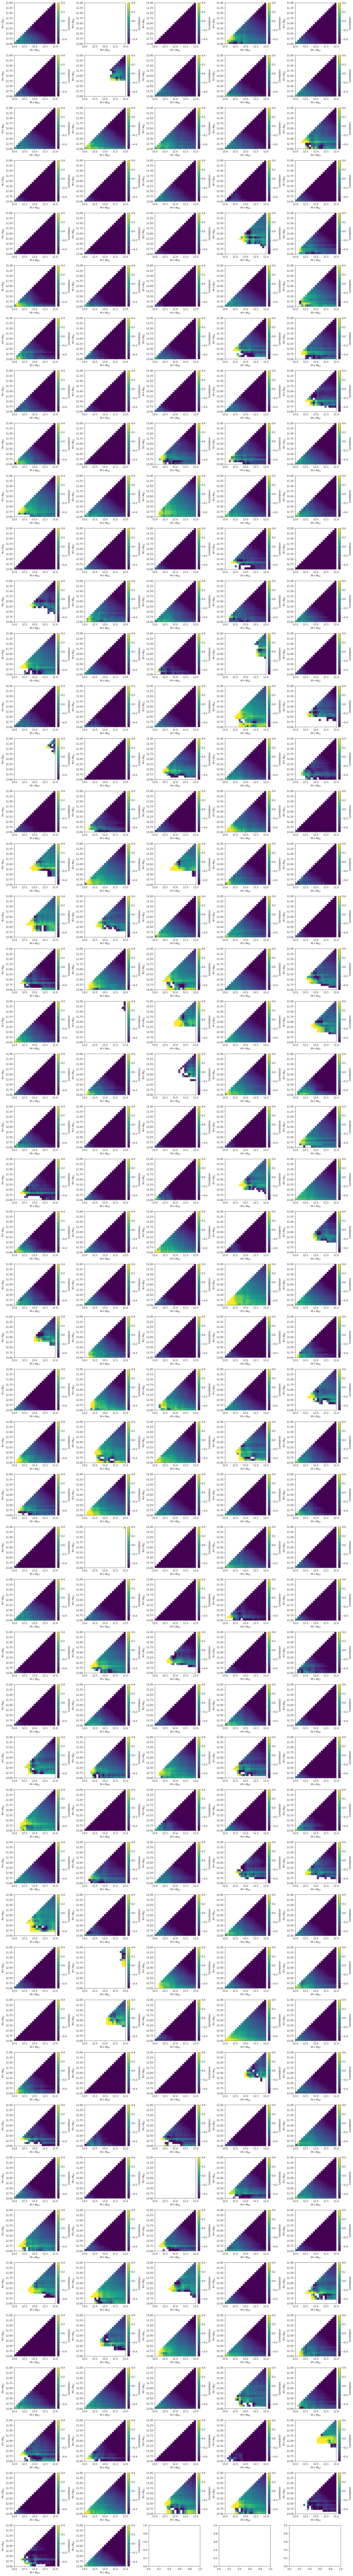

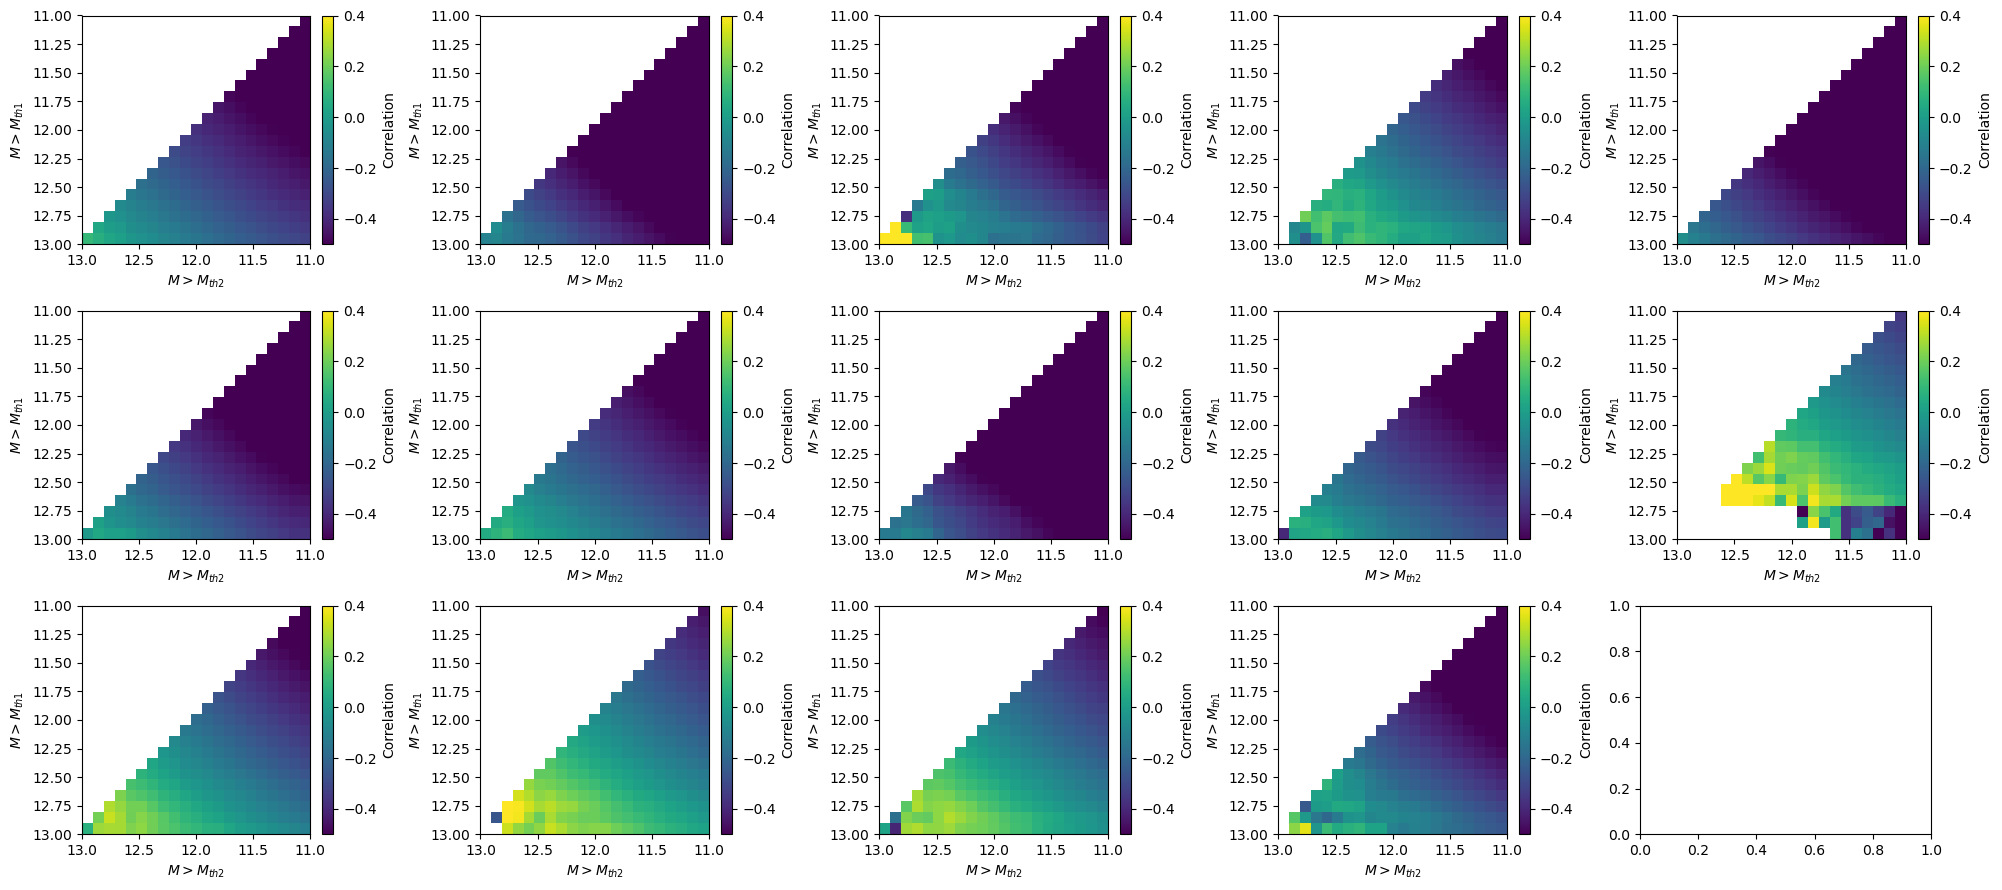

In [1]:
from gal_goku import plot
from glob import glob

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
plt_xi = plot.PlotXiSims()
plt_xi.plot_all_2d(r_ind=25, fid='L2', data_dir=data_dir)
plt_xi.plot_all_2d(r_ind=25, fid='HF', data_dir=data_dir)

    

BaseStatEmu | 02/24/2025 02:25:32 PM | Rank 0 | INFO  |  Total sims files: 8 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
BaseStatEmu | 02/24/2025 02:25:32 PM | Rank 0 | INFO  |  Total sims files: 8 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF
BaseStatEmu | 02/24/2025 02:25:32 PM | Rank 0 | INFO  |  Total sims files: 8 in /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/HF


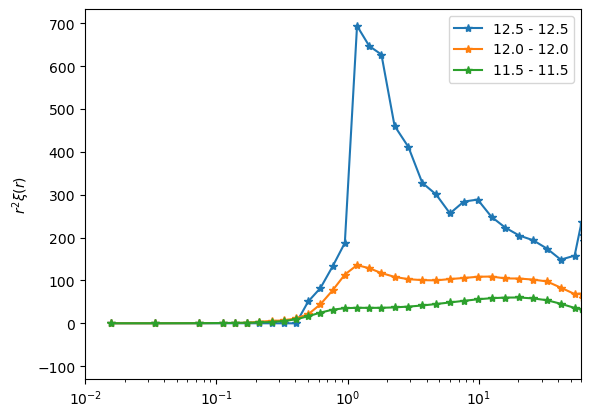

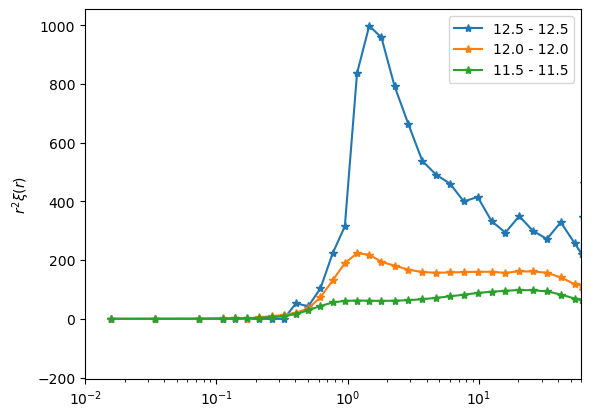

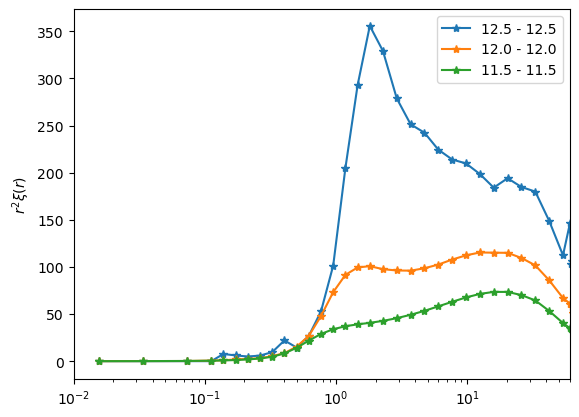

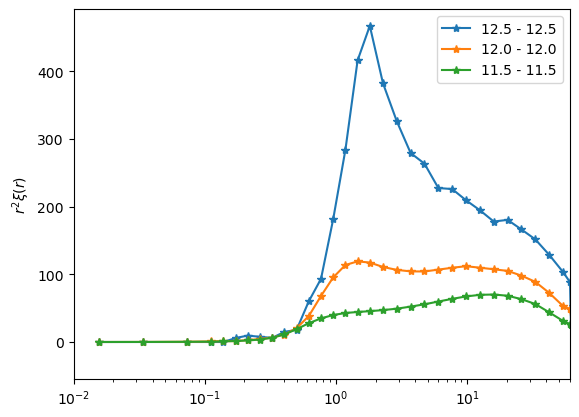

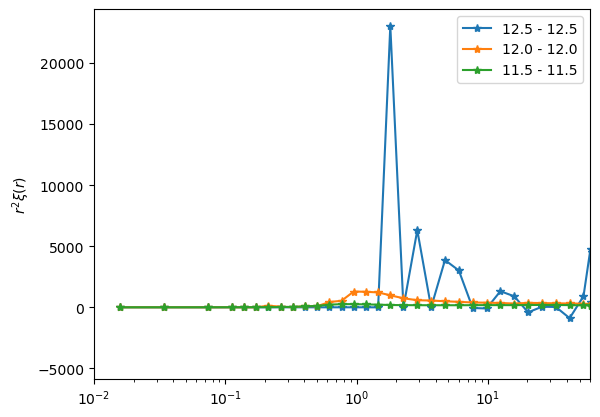

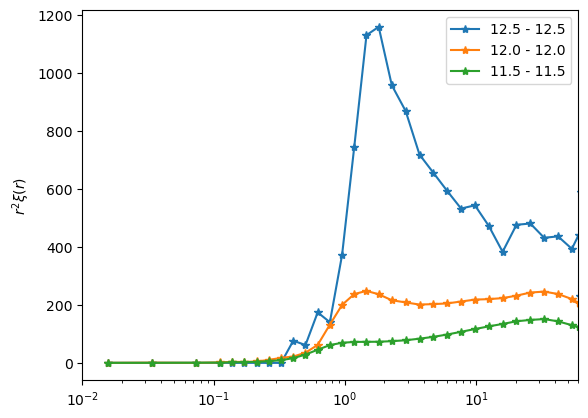

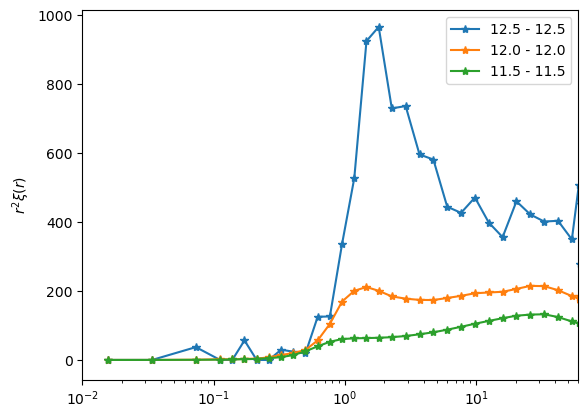

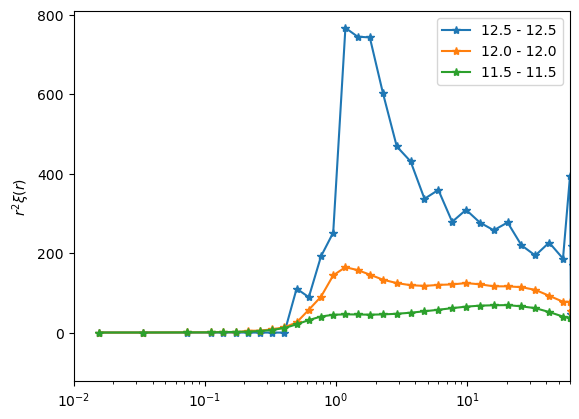

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from gal_goku import summary_stats

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
fid = 'HF'
xi = summary_stats.Xi(data_dir, fid)
for sim_tag in xi.sim_tags:
    sim_tag, rbins, corr, mass_pairs = xi.load_individual(sim_tag)
    fig, ax = plt.subplots()
    for m in np.arange(12.5, 11.0, -0.5):
        mth =  [np.around(m, 1)]*2
        mass_pairs = np.around(mass_pairs, 1)
        ind = np.where((mass_pairs[:,0]==mth[0])*(mass_pairs[:,1]==mth[1]))
        ax.plot(rbins, rbins**2 * corr[ind][0], label=f'{mth[0]:.1f} - {mth[1]:.1f}', marker='*')
    ax.legend()
    ax.set_xlim((0.01, 60))
    ax.set_xscale('log')
    ax.set_ylabel(r'$r^2 \xi(r)$')
    #ax.set_yscale('log')



## Num of training points for each simulation: 

If we keep only 6 mass theshold bins (instead of 13) and only 5 spline coefficients for the corr func (instead of 50), we have this training points for each simulation:

In [16]:
(mass_pairs.shape[0]/4)*(rbins.size/10)

288.75